In [1]:
from classifier import load_data, classify, test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train, X_test, y_train, y_test = load_data(0.4, 700000)

In [3]:
rf, _ = classify("rf", X_train, y_train)
dt, _ = classify("dt", X_train, y_train)

knn, _ = classify("knn", X_train, y_train)
ab, _ = classify("ab", X_train, y_train)

In [4]:
pred1 = rf.predict(X_test)
pred2 = dt.predict(X_test)
pred3 = knn.predict(X_test)
pred4 = ab.predict(X_test)

In [5]:
df = pd.DataFrame({
    'y_test': y_test,
    'rf': pred1,
    'dt': pred2,
    'knn': pred3,
    'ab': pred4
})
disagree_mask = (df['rf'] != df['dt']) | (df['rf'] != df['knn']) | (df['knn'] != df['dt'])
# Filter only the disagreement rows
df_disagreements = df[disagree_mask]

In [6]:
df_disagreements

,y_test,rf,dt,knn,ab
213512,0,0,0,1,1
178527,1,1,1,0,0
622508,1,1,1,0,1
656525,0,0,1,1,1
130912,1,1,1,0,0
...,...,...,...,...,...
261950,1,1,1,0,1
697190,1,1,1,0,0
268277,0,0,0,1,0
345221,1,1,1,0,0


In [7]:
# Get stats for rf
rf_tp = df[(df['rf'] == 1) & (df['y_test'] == 1)].shape[0]
rf_fn = df[(df['rf']== 0) & (df['y_test'] == 1)].shape[0]
rf_fp  = df[(df['rf'] == 1) & (df['y_test'] == 0)].shape[0]
rf_tn = df[(df['rf'] == 0) & (df['y_test'] == 0)].shape[0]
print(f"True positives: {rf_tp}")
print(f"False negatives: {rf_fn}")
print(f"False positives: {rf_fp}")
print(f"True negatives: {rf_tn}")

True positives: 55710
False negatives: 1158
False positives: 1448
True negatives: 221684


In [8]:
# Get stats for dt
dt_tp = df[(df['dt'] == 1) & (df['y_test'] == 1)].shape[0]
dt_fn = df[(df['dt']== 0) & (df['y_test'] == 1)].shape[0]
dt_fp  = df[(df['dt'] == 1) & (df['y_test'] == 0)].shape[0]
dt_tn = df[(df['dt'] == 0) & (df['y_test'] == 0)].shape[0]
print(f"True positives: {dt_tp}")
print(f"False negatives: {dt_fn}")
print(f"False positives: {dt_fp}")
print(f"True negatives: {dt_tn}")

True positives: 55297
False negatives: 1571
False positives: 1540
True negatives: 221592


In [9]:
# Get stats for knn
knn_tp = df[(df['knn'] == 1) & (df['y_test'] == 1)].shape[0]
knn_fn = df[(df['knn']== 0) & (df['y_test'] == 1)].shape[0]
knn_fp  = df[(df['knn'] == 1) & (df['y_test'] == 0)].shape[0]
knn_tn = df[(df['knn'] == 0) & (df['y_test'] == 0)].shape[0]
print(f"True positives: {knn_tp}")
print(f"False negatives: {knn_fn}")
print(f"False positives: {knn_fp}")
print(f"True negatives: {knn_tn}")

True positives: 50664
False negatives: 6204
False positives: 1911
True negatives: 221221


In [10]:
# Get stats for ab
ab_tp = df[(df['ab'] == 1) & (df['y_test'] == 1)].shape[0]
ab_fn = df[(df['ab']== 0) & (df['y_test'] == 1)].shape[0]
ab_fp  = df[(df['ab'] == 1) & (df['y_test'] == 0)].shape[0]
ab_tn = df[(df['ab'] == 0) & (df['y_test'] == 0)].shape[0]
print(f"True positives: {ab_tp}")
print(f"False negatives: {ab_fn}")
print(f"False positives: {ab_fp}")
print(f"True negatives: {ab_tn}")

True positives: 47226
False negatives: 9642
False positives: 2267
True negatives: 220865


In [11]:
# Get stats for any(rf, dt, knn)
at_least_one_mask = (df['rf'] == 1) | (df['dt'] == 1) | (df['knn'] == 1)
h3_tp = df[at_least_one_mask & (df['y_test'] == 1)].shape[0]
h3_fn = df[~at_least_one_mask & (df['y_test'] == 1)].shape[0]
h3_fp = df[at_least_one_mask & (df['y_test'] == 0)].shape[0]
h3_tn = df[~at_least_one_mask & (df['y_test'] == 0)].shape[0]
print(f"True positives: {h3_tp}")
print(f"False negatives: {h3_fn}")
print(f"False positives: {h3_fp}")
print(f"True negatives: {h3_tn}")

True positives: 56395
False negatives: 473
False positives: 2785
True negatives: 220347


In [12]:
# Get stats for any(rf, dt, knn, ab)
at_least_one_mask = (df['rf'] == 1) | (df['dt'] == 1) | (df['knn'] == 1) | (df['ab'] == 1)
h4_tp = df[at_least_one_mask & (df['y_test'] == 1)].shape[0]
h4_fn = df[~at_least_one_mask & (df['y_test'] == 1)].shape[0]
h4_fp = df[at_least_one_mask & (df['y_test'] == 0)].shape[0]
h4_tn = df[~at_least_one_mask & (df['y_test'] == 0)].shape[0]
print(f"True positives: {h4_tp}")
print(f"False negatives: {h4_fn}")
print(f"False positives: {h4_fp}")
print(f"True negatives: {h4_tn}")

True positives: 56640
False negatives: 228
False positives: 4068
True negatives: 219064


In [37]:
# Get stats for any(rf, dt, knn, ab)
at_least_two_mask = (df['rf'] + df['dt'] + df['knn'] + df['ab'] >= 2)
H4_tp = df[at_least_two_mask & (df['y_test'] == 1)].shape[0]
H4_fn = df[~at_least_two_mask & (df['y_test'] == 1)].shape[0]
H4_fp = df[at_least_two_mask & (df['y_test'] == 0)].shape[0]
H4_tn = df[~at_least_two_mask & (df['y_test'] == 0)].shape[0]
print(f"True positives: {H4_tp}")
print(f"False negatives: {H4_fn}")
print(f"False positives: {H4_fp}")
print(f"True negatives: {H4_tn}")

True positives: 55912
False negatives: 956
False positives: 1892
True negatives: 221240


In [16]:
ratios = np.linspace(0.05, 0.95, 1001)

In [17]:
def simulated_f2(tp, fn, fp, tn, new_ratio):
    total0 = fp + tn
    total1 = tp + fn
    sim_tp = new_ratio * tp/(tp+fn)
    sim_fn = new_ratio * fn/(tp+fn)
    sim_fp = (1-new_ratio) * fp/(fp+tn)
    prec = sim_tp/(sim_tp+sim_fp)
    rec = sim_tp/(sim_tp+sim_fn)
    return 5 * prec * rec / (4 * prec + rec)

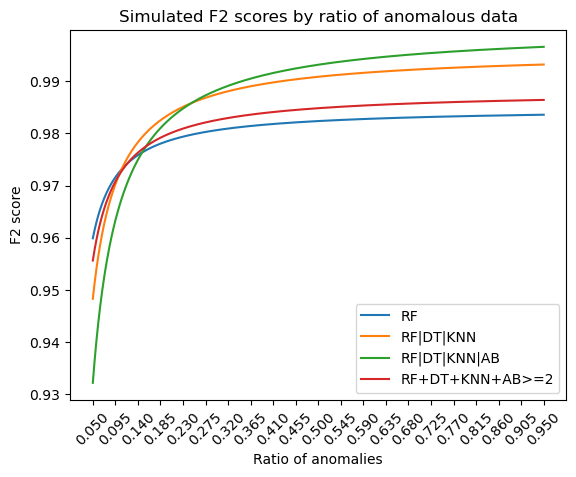

In [38]:
plt.plot(ratios, [simulated_f2(rf_tp, rf_fn, rf_fp, rf_tn, r) for r in ratios], label="RF")
plt.plot(ratios, [simulated_f2(h3_tp, h3_fn, h3_fp, h3_tn, r) for r in ratios], label="RF|DT|KNN")
plt.plot(ratios, [simulated_f2(h4_tp, h4_fn, h4_fp, h4_tn, r) for r in ratios], label="RF|DT|KNN|AB")
plt.plot(ratios, [simulated_f2(H4_tp, H4_fn, H4_fp, H4_tn, r) for r in ratios], label="RF+DT+KNN+AB>=2")

plt.xlabel("Ratio of anomalies")
plt.ylabel("F2 score")
plt.xticks(ratios[::50], rotation=45)
plt.title("Simulated F2 scores by ratio of anomalous data")
plt.legend()
plt.show()

In [22]:
ab2, _ = classify("ab-custom", X_train, y_train, metadata=5)
pred5 = ab2.predict(X_test)

df2 = pd.DataFrame({
    'y_test': y_test,
    'rf': pred1,
    'dt': pred2,
    'knn': pred3,
    'ab': pred4,
    'ab2': pred5
})

In [23]:
# Get stats for ab
ab2_tp = df2[(df2['ab2'] == 1) & (df2['y_test'] == 1)].shape[0]
ab2_fn = df2[(df2['ab2']== 0) & (df2['y_test'] == 1)].shape[0]
ab2_fp  = df2[(df2['ab2'] == 1) & (df2['y_test'] == 0)].shape[0]
ab2_tn = df2[(df2['ab2'] == 0) & (df2['y_test'] == 0)].shape[0]
print(f"True positives: {ab2_tp}")
print(f"False negatives: {ab2_fn}")
print(f"False positives: {ab2_fp}")
print(f"True negatives: {ab2_tn}")

True positives: 55733
False negatives: 1135
False positives: 1820
True negatives: 221312


In [32]:
# Get stats for any(rf, dt, knn, ab)
at_least_one_mask = (df2['rf'] == 1) | (df2['dt'] == 1) | (df2['knn'] == 1) | (df2['ab2'] == 1)
h4c_tp = df2[at_least_one_mask & (df2['y_test'] == 1)].shape[0]
h4c_fn = df2[~at_least_one_mask & (df2['y_test'] == 1)].shape[0]
h4c_fp = df2[at_least_one_mask & (df2['y_test'] == 0)].shape[0]
h4c_tn = df2[~at_least_one_mask & (df2['y_test'] == 0)].shape[0]
print(f"True positives: {h4c_tp}")
print(f"False negatives: {h4c_fn}")
print(f"False positives: {h4c_fp}")
print(f"True negatives: {h4c_tn}")

True positives: 56613
False negatives: 255
False positives: 3154
True negatives: 219978


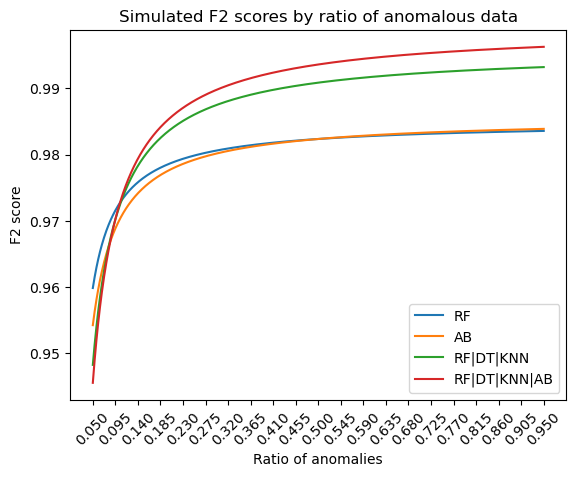

In [34]:
plt.plot(ratios, [simulated_f2(rf_tp, rf_fn, rf_fp, rf_tn, r) for r in ratios], label="RF")
plt.plot(ratios, [simulated_f2(ab2_tp, ab2_fn, ab2_fp, ab2_tn, r) for r in ratios], label="AB")
plt.plot(ratios, [simulated_f2(h3_tp, h3_fn, h3_fp, h3_tn, r) for r in ratios], label="RF|DT|KNN")
plt.plot(ratios, [simulated_f2(h4c_tp, h4c_fn, h4c_fp, h4c_tn, r) for r in ratios], label="RF|DT|KNN|AB")
#plt.axvline(0.11)

plt.xlabel("Ratio of anomalies")
plt.ylabel("F2 score")
plt.xticks(ratios[::50], rotation=45)
plt.title("Simulated F2 scores by ratio of anomalous data")
plt.legend()
plt.show()

In [35]:
# Get stats for any(rf, dt, knn, ab)
at_least_two_mask = (df2['rf'] + df2['dt'] + df2['knn'] + df2['ab2'] >= 2)
H4c_tp = df2[at_least_two_mask & (df2['y_test'] == 1)].shape[0]
H4c_fn = df2[~at_least_two_mask & (df2['y_test'] == 1)].shape[0]
H4c_fp = df2[at_least_two_mask & (df2['y_test'] == 0)].shape[0]
H4c_tn = df2[~at_least_two_mask & (df2['y_test'] == 0)].shape[0]
print(f"True positives: {H4c_tp}")
print(f"False negatives: {H4c_fn}")
print(f"False positives: {H4c_fp}")
print(f"True negatives: {H4c_tn}")

True positives: 56088
False negatives: 780
False positives: 1837
True negatives: 221295


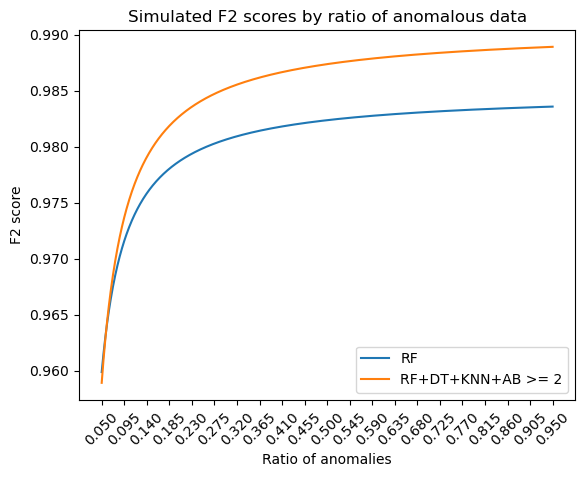

In [41]:
plt.plot(ratios, [simulated_f2(rf_tp, rf_fn, rf_fp, rf_tn, r) for r in ratios], label="RF")
#plt.plot(ratios, [simulated_f2(ab2_tp, ab2_fn, ab2_fp, ab2_tn, r) for r in ratios], label="AB")
#plt.plot(ratios, [simulated_f2(h3_tp, h3_fn, h3_fp, h3_tn, r) for r in ratios], label="RF|DT|KNN")
#plt.plot(ratios, [simulated_f2(h4c_tp, h4c_fn, h4c_fp, h4c_tn, r) for r in ratios], label="RF|DT|KNN|AB")
plt.plot(ratios, [simulated_f2(H4c_tp, H4c_fn, H4c_fp, H4c_tn, r) for r in ratios], label="RF+DT+KNN+AB >= 2")
#plt.axvline(0.11)

plt.xlabel("Ratio of anomalies")
plt.ylabel("F2 score")
plt.xticks(ratios[::50], rotation=45)
plt.title("Simulated F2 scores by ratio of anomalous data")
plt.legend()
plt.show()